# Задание

Пусть $x_1, x_2, ..., x_n \text{  ~  } N(a, \sigma^2)$
- Продемонстрируйте состоятельность выборочной дисперсии по определению (используя определение состоятельной оценки).
- Продемонстрируйте, что выборочная дисперсия нормального распределения имеет распределение хи-квадрат:
$$ n \cdot \frac{\overline{S_n}^2}{\sigma^2} \text{  ~  } \chi^2(n-1)$$

Требования:
 - Для сдачи домашнего задания используйте Google Colab/Github. Ожидается, что ноутбук будет выложен на Github/Colab (не файл .ipyn}, присланный куда-либо).
 - Для данного домашнего задания можно использовать языки программирования R, Python.
 - Задания необходимо выполнять в RMarkdown либо Jupyter Notebook с комментариями и пояснениями.

----------------------------------------------------------------------
Для моделирования было выбрано нормальное распределение с математическим ожиданием 10 и дисперсией 25. Теоретическую функцию распределения будем строить с помощью библиотеки scipy.

# 1.1) Импортирование библиотек, которые понадобятся в ходе выполнения задания

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import chi2

In [2]:
a = 10
sigma = 5

# 1.2) Зададим функцию, которая будет отображать теоретическое значение дисперсии

In [3]:
x_theor = np.linspace(0, 100, num=1000)
y_theor = [25]*1000

# 1.3) Зададим функцию, которая будет отображать зависимоть оценки от количества наблюдений

In [4]:
norm_dist = norm(loc=a, scale=sigma)  # распределение

In [5]:
x_n = norm_dist.rvs(size=10**6)  # выборка объема 10^6

In [6]:
print(f'Среднее сгенерированной выборки: {np.mean(x_n)} \nДисперсия сгенерированной выборки: {np.var(x_n)}')

Среднее сгенерированной выборки: 9.99685043524546 
Дисперсия сгенерированной выборки: 25.039601759093355


In [7]:
# храним массив для построения оценки
# для 100 выборок сгенерировали по 50 дисперсий
thetta = np.zeros((100,50))
for n in range(100, 10100, 100):
    # берем из генеральной совокупности 50 выборок объема n, значения не повторяются (replace=False)
    x_sample = np.random.choice(x_n, size=(n, 50), replace=False)
    # считаем для каждой выборки выборочную дисперсию
    # по умолчанию ddof=0, то есть считается обычная смещенная дисперсия(1/n), а не исправленная (1/(n-1)
    x_sample_var = np.var(x_sample, axis=0)
    # записываем в массив полученные выборочные дисперсии
    thetta[n//100-1] = x_sample_var

# 1.4) Отрисуем теоретическую дисперсию и выборочные дисперсии в зависимости от размера выборки

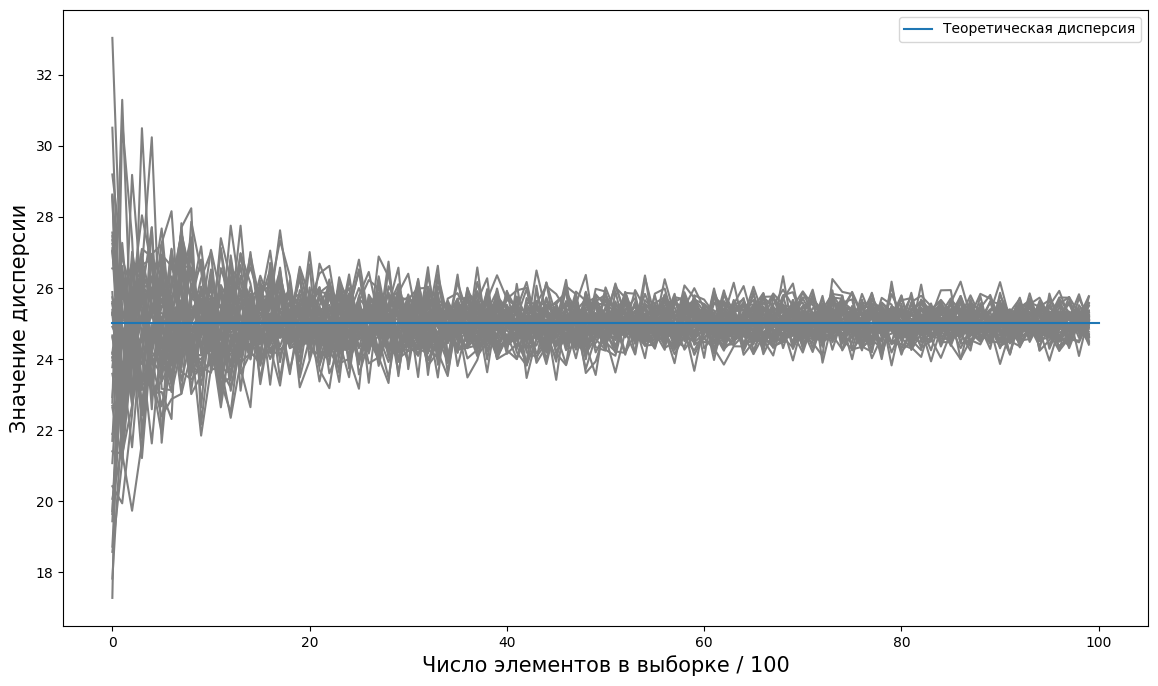

In [8]:
plt.figure(figsize=(14,8))
plt.plot(thetta, c='grey')
plt.plot(x_theor, y_theor, label='Теоретическая дисперсия')
plt.xlabel('Число элементов в выборке / 100', size=15)
plt.ylabel('Значение дисперсии', size=15)
plt.legend();

Видим, что все 50 выборочных дисперсий с ростом количества элементов в выборке стремятсяя к теоретическому параметру

# 2) Сгенерируем распределение $n \cdot \frac{\overline{S_n}^2}{\sigma^2}$ (путем многократной генерации выборки из нормального распределения с параметрами ($a$, $\sigma$)) и построим его на одном графике с $\chi^2(n-1)$

In [9]:
def model_chi_square(n, a, sigma, num_modeling):
    """
    Моделирование статистики, которая в теории должна иметь хи-квадрат распределение с n-1 степенью свободы
    """
    # массив, в котором хранятся значения функции n*Sn / sigma**2
    stats = np.empty(num_modeling)  
    # делаем num_modeling для генерации выборки, по которой будем строить гистограмму
    for i in range(num_modeling):
        # выборка размера n из нормального распределения с параметрами (a, sigma)
        x_sample = norm.rvs(loc=a, scale=sigma, size=n)  
        # Выборочная дисперсия
        Sn = np.var(x_sample) 
        # считаем значение функции, которая должна иметь хи-квадрат распределение с n-1 степенью свободы
        stats[i] = n*Sn / sigma**2
    return stats

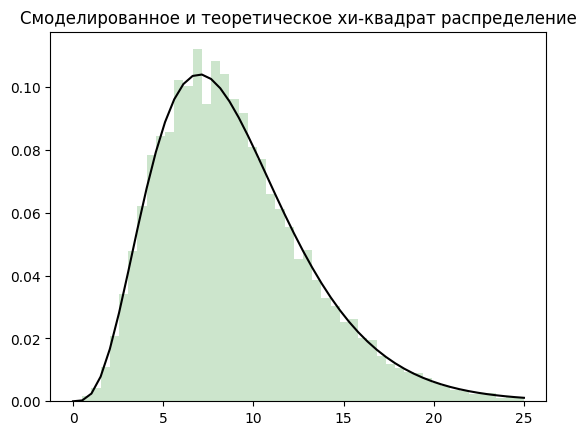

In [10]:
n = 10 # число элементов в выборке
num_modeling = 10000  # число элементов для подсчета выражения n*Sn / sigma**2
stats = model_chi_square(n, a, sigma, num_modeling) # 

# гистограмма симуляции и теоретическое хи-квадрат распределение
# бины для построения гистрограммы
bins = np.linspace(0, 25, 50)  
# строим гистограмму, при этом нормализуем данные (deensity=True): площадь под гистограммой = 1
plt.hist(stats, density=True, alpha=0.2, color='g', bins=bins)  
# строим хи-квадрат распределение с числом степеней свободы n-1
plt.plot(bins, chi2.pdf(bins, df=n-1), 'k')
plt.title("Смоделированное и теоретическое хи-квадрат распределение")
plt.show()

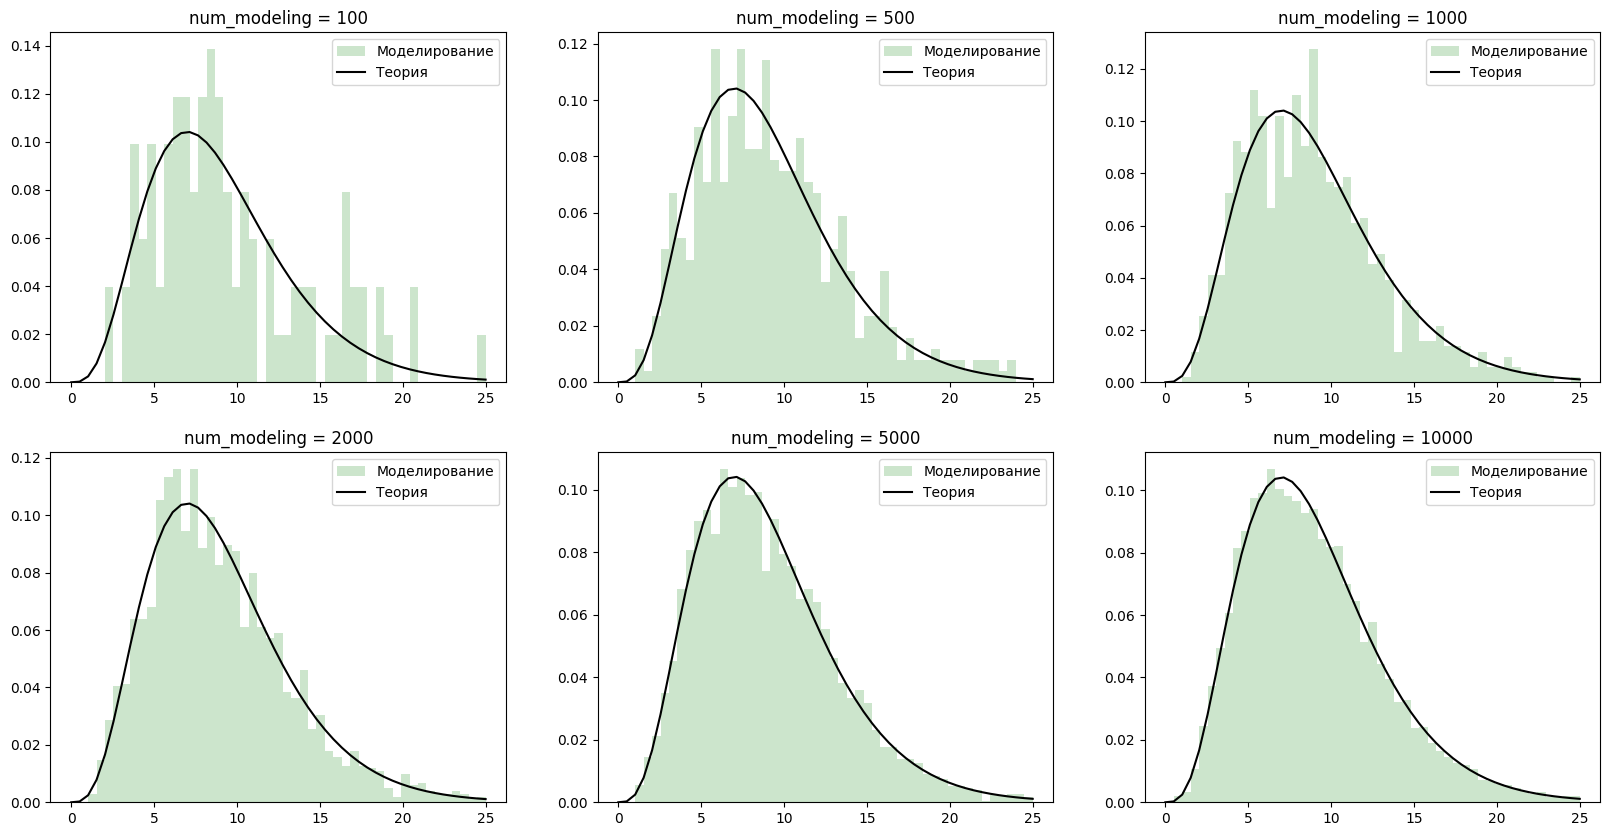

In [11]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))  # сказали, что будет матрица из пикч длиной 4 и высотой 2
bins = np.linspace(0, 25, 50)
num_modeling = [100, 500, 1000, 2000, 5000, 10000]
ctr = 0  # счетчик для итерации оп массиву numbers
for i in range(2):  # 2 пикчи в высоту
    for j in range(3):  # 4 пикчи в длину
        stats = model_chi_square(n, a, sigma, num_modeling[ctr])
        axs[i, j].hist(stats, density=True, alpha=0.2, color='g', bins=bins, label='Моделирование')
        axs[i, j].plot(bins, chi2.pdf(bins, df=n-1), 'k', label='Теория')
        axs[i, j].set_title(f'num_modeling = {num_modeling[ctr]}')
        axs[i, j].legend()
        ctr += 1

Видим, что если много раз брать выборку из нормального распределения с параметрами $a$ и $\sigma$ и считать функцию $n \cdot \frac{\overline{S_n}^2}{\sigma^2}$, то она действительно стремится к распределению хи-квадрат с n-1 степенью свободы